In [17]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
import seaborn as sns

In [3]:
#Loading the dataset
boston = load_boston()
bos = pd.DataFrame(boston.data)
bos

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [9]:
#Column names
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [10]:
bos.columns=boston.feature_names

In [11]:
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [13]:
#description of the data
bos.describe(include="all")

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [14]:
#checking null values
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [15]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


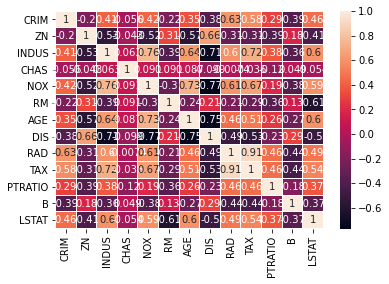

In [20]:
data= bos.corr()
sns.heatmap(data=data,annot=True,linewidths=0.1)

In [23]:
#target feature
bos['Price']=boston.target

In [24]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


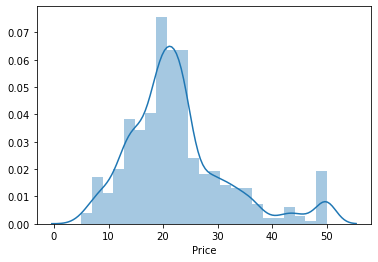

In [25]:
sns.distplot(bos['Price'])

# Splitting the data

In [26]:
X=bos.drop('Price',axis=1)
y=bos.Price

In [27]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [28]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [72]:
X_train.shape

(379, 13)

In [73]:
X_test.shape

(127, 13)

# Building Linear Regression Model

In [74]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [75]:
lm.fit(X_train,y_train)

LinearRegression()

In [76]:
print(lm.intercept_)

33.71578930966684


In [77]:
print(lm.coef_)

[-1.25880432e-01  5.75701579e-02 -1.64176782e-02  1.26424476e+00
 -1.53889114e+01  3.49476939e+00  1.14889216e-02 -1.47070952e+00
  2.92530481e-01 -1.22132679e-02 -8.41219182e-01  1.24793327e-02
 -5.36883458e-01]


In [78]:
i=0
for col in X:
    print('The Coefficient of ',col, ' is: ',lm.coef_[i])
    i=i+1

The Coefficient of  CRIM  is:  -0.12588043231455698
The Coefficient of  ZN  is:  0.05757015790994045
The Coefficient of  INDUS  is:  -0.01641767821681713
The Coefficient of  CHAS  is:  1.2642447569782522
The Coefficient of  NOX  is:  -15.388911387198146
The Coefficient of  RM  is:  3.4947693913231648
The Coefficient of  AGE  is:  0.01148892156389869
The Coefficient of  DIS  is:  -1.4707095241926917
The Coefficient of  RAD  is:  0.2925304812810781
The Coefficient of  TAX  is:  -0.012213267874961457
The Coefficient of  PTRATIO  is:  -0.8412191822538633
The Coefficient of  B  is:  0.012479332733294268
The Coefficient of  LSTAT  is:  -0.5368834583101836


In [79]:
pred=lm.predict(X_test)
pred

array([31.11439635, 31.82060232, 30.55620556, 22.44042081, 18.80398782,
       16.27625322, 36.13534369, 14.62463338, 24.56196194, 37.27961695,
       21.29108382, 30.61258241, 27.94888799, 33.80697059, 33.25072336,
       40.77177784, 24.3173198 , 23.29773241, 25.50732006, 21.08959787,
       32.79810915, 17.7713081 , 25.36693209, 25.03811059, 32.51925813,
       20.4761305 , 19.69609206, 16.93696274, 38.25660623,  0.70152499,
       32.34837791, 32.21000333, 25.78226319, 23.95722044, 20.51116476,
       19.53727258,  3.87253095, 34.74724529, 26.92200788, 27.63770031,
       34.47281616, 29.80511271, 18.34867051, 31.37976427, 18.14935849,
       28.22386149, 19.25418441, 21.71490395, 38.26297011, 16.44688057,
       24.60894426, 19.48346848, 24.49571194, 34.48915635, 26.66802508,
       34.83940131, 20.91913534, 19.60460332, 18.52442576, 25.00178799,
       19.86388846, 23.46800342, 39.56482623, 42.95337289, 30.34352231,
       16.8933559 , 23.88883179,  3.33024647, 31.45069577, 29.07

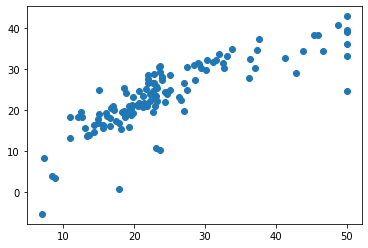

In [80]:
plt.scatter(y_test,pred)

In [81]:
df1=pd.DataFrame({'Actual':y_test, 'predicted':pred})
df1.head()

,Actual,predicted
305,28.4,31.114396
193,31.1,31.820602
65,23.5,30.556206
349,26.6,22.440421
151,19.6,18.803988


In [82]:
from sklearn import metrics

In [68]:
print(f'MAE:{metrics.mean_absolute_error(y_test, pred)}')
print(f'MSE:{metrics.mean_squared_error(y_test, pred)}')
print(f'RMSE:{np.sqrt(metrics.mean_squared_error(y_test, pred))}')

MAE:3.3884038714080105
MSE:27.173144173043575
RMSE:5.212786603443841
